In [1]:
import numpy
import pandas
from sklearn.datasets import load_boston

In [2]:
raw_boston = load_boston()

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

In [3]:
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
data.shape

(506, 13)

In [5]:
raw_boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
print(raw_boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(raw_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston = pd.DataFrame(raw_boston.data, columns = raw_boston.feature_names)

In [9]:
boston.shape

(506, 13)

In [10]:
dataset = pd.DataFrame(np.c_[boston['ZN'], boston['CRIM'], boston['RM'], boston['LSTAT']])

In [11]:
dataset = dataset.values

In [12]:
type(dataset)

numpy.ndarray

In [13]:
dataset.shape

(506, 4)

In [14]:
u = np.mean(dataset, axis = 0)
print(u.shape)

(4,)


In [15]:
std = np.std(dataset, axis = 0)
print(std.shape)

(4,)


In [16]:
dataset = (dataset - u)/std

In [17]:
dataset

array([[ 0.28482986, -0.41978194,  0.41367189, -1.0755623 ],
       [-0.48772236, -0.41733926,  0.19427445, -0.49243937],
       [-0.48772236, -0.41734159,  1.28271368, -1.2087274 ],
       ...,
       [-0.48772236, -0.41344658,  0.98496002, -0.98304761],
       [-0.48772236, -0.40776407,  0.72567214, -0.86530163],
       [-0.48772236, -0.41500016, -0.36276709, -0.66905833]])

In [18]:
split = 0.8
train_X = dataset[:int(split * dataset.shape[0]), :]
test_X = dataset[int(split * dataset.shape[0]):, :]
train_Y = raw_boston.target[:int(split * dataset.shape[0])]
test_Y = raw_boston.target[int(split * dataset.shape[0]):]

In [19]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(404, 4) (102, 4) (404,) (102,)


In [20]:
print(type(train_X), type(test_X), type(train_Y), type(test_Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [21]:
dataset.shape

(506, 4)

In [22]:
ones = np.ones((train_X.shape[0], 1))
train_X = np.hstack((ones, train_X))

In [23]:
train_X.shape

(404, 5)

In [32]:
def hypothesis(X, weight):
    y_pred = 0
    for i in range(X.shape[0]):       # 0 because of the vector of train_X
        y_pred += weight[i]*X[i]
    return y_pred

In [26]:
def loss_function(X, Y, weight):
    loss = 0
    
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weight)
        y_t = Y[i]
        
        loss += (y_pred - y_t)**2
        
    return loss/X.shape[0]

In [36]:
def gradient(X, Y, weights):
    
    grad = np.zeros((X.shape[1], ))
    
    for j in range(X.shape[1]):
        for i in range(X.shape[0]):
            y_pred = hypothesis(X[i], weights)
            y_t = Y[i]

            grad[j] += (y_pred - y_t) * X[i][j]
        
    return grad/X.shape[0]

In [45]:
def gradient_descent(X, Y):
    lr_rate = 0.003
    weight = np.zeros((X.shape[1], ))
    
    loss_epoch = []
    epoch = 5000
    
    for i in range(epoch):
        
        grad = gradient(X, Y, weight)
        
        for j in range(X.shape[1]):
            weight[j] = weight[j] - lr_rate * grad[j]
            
        loss = loss_function(X, Y, weight)
        loss_epoch.append(loss)
        
    return weight, loss_epoch

In [46]:
weight, loss_epoch = gradient_descent(train_X, train_Y)

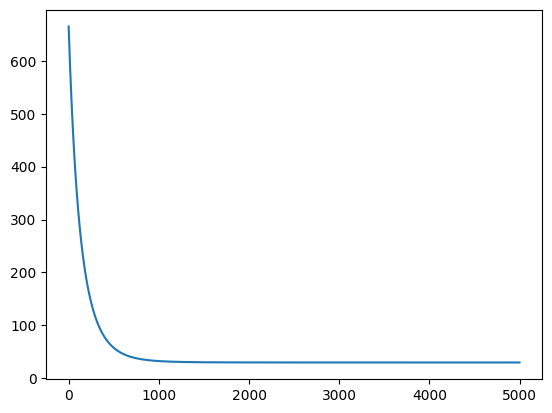

In [47]:
import matplotlib.pyplot as plt
plt.plot(loss_epoch)

In [48]:
# ___________________ OPTIMIZED CODE ________________________________________

In [50]:
def hypothesis(X, weight):
    return np.dot(X, weight)

In [57]:
def loss_function(X, Y, weight):
    loss = 0
    
    y_pred = hypothesis(X, weight)

    loss = np.mean((y_pred - Y)**2)
        
    return loss

In [58]:
def gradient(X, Y, weights):
    
    y_pred = hypothesis(X, weights)

    grad = np.dot(X.T, (y_pred - Y))
        
    return grad/X.shape[0]

In [59]:
def gradient_descent(X, Y):
    lr_rate = 0.003
    weight = np.zeros((X.shape[1], ))
    
    loss_epoch = []
    epoch = 5000
    
    for i in range(epoch):
        
        grad = gradient(X, Y, weight)
        
        weight = weight - lr_rate * grad
            
        loss = loss_function(X, Y, weight)
        loss_epoch.append(loss)
        
    return weight, loss_epoch

In [60]:
weight, loss_epoch = gradient_descent(train_X, train_Y)

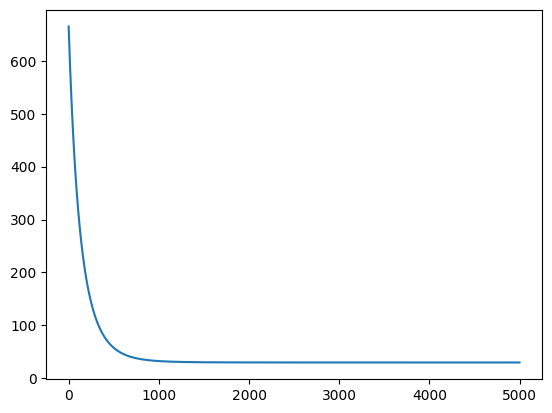

In [61]:
plt.plot(loss_epoch)

In [62]:
ones = np.ones((test_X.shape[0], 1))
test_X = np.hstack((ones, test_X))

In [63]:
y_pred = hypothesis(test_X, weight)

In [64]:
from sklearn import metrics

In [66]:
print(f'MSE: {metrics.mean_squared_error(y_pred, test_Y)}')
print(f'MAE: {metrics.mean_absolute_error(y_pred, test_Y)}')
print(f'RMSE: {(metrics.mean_squared_error(y_pred, test_Y))**0.5}')

MSE: 33.41459052230842
MAE: 4.69568152186628
RMSE: 5.7805354875053245


In [67]:
for i in range(y_pred.shape[0]):
    print(y_pred[i], test_Y[i])

7.475219594474156 8.5
7.99387120366686 5.0
2.5138944237426224 11.9
18.14533405243841 27.9
11.808283252672652 17.2
22.202598194411145 27.5
16.26260914584417 15.0
20.30208765756021 17.2
0.5516255619933805 17.9
9.815165191223066 16.3
-4.011473236526104 7.0
14.731904131229875 7.2
19.225267469412305 7.5
7.8899915445182085 10.4
10.333497664551915 8.8
20.8602943246859 8.4
21.985149213058527 16.7
19.461400354237153 14.2
17.448228088314806 20.8
16.44361182321839 13.4
15.76710535055731 11.7
13.736224374708138 8.3
17.877099634612346 10.2
18.306769964185605 10.9
17.83693368899182 11.0
17.61620735551531 9.5
20.578687168155337 14.5
22.54892807141174 14.1
23.95794822653596 16.1
22.10490249541154 14.3
20.339416326844898 11.7
19.421384414094792 13.4
20.530062906272754 9.6
14.454481290545957 8.7
9.584432996137249 8.4
13.365693428099082 12.8
13.72811839058289 10.5
19.929737292799302 17.1
20.5302366498367 18.4
20.732896855375373 15.4
14.051679435719903 10.8
18.040428869507767 11.8
20.67599919650362 14.9
2

In [68]:
data.shape

(506, 13)

In [73]:
df = np.hstack((data[:, 0].reshape(-1, 1), data[:, 2].reshape(-1, 1), data[:, -1].reshape(-1, 1)))

In [74]:
df.shape

(506, 3)

In [75]:
a = np.array([1,2,3,4,5,6,7,8,9,0])

In [80]:
a.reshape(-1, 5).shape

(2, 5)